In [14]:
!pip install requests
!pip install beautifulsoup4
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests
import bs4
import lxml.etree as xml

In [15]:
import re
import json

URL = "https://9gag.com/india"

res = requests.get(URL)
html = res.text

m = re.search('JSON\.parse\((.*)\);</script>', html)
double_encoded = m.group(1)
encoded = json.loads(double_encoded)
parsed = json.loads(encoded)

images = [p['images']['image700']['url'] for p in parsed['data']['posts']]
print(images)

['https://miscmedia-9gag-fun.9cache.com/images/thumbnail-facebook/50977306_1600074539.6822_SYgYJE_700b.jpg', 'https://img-9gag-fun.9cache.com/photo/ayezD9r_700b.jpg', 'https://img-9gag-fun.9cache.com/photo/aGdo0X6_460s.jpg', 'https://img-9gag-fun.9cache.com/photo/a2Wxr7p_460s.jpg', 'https://img-9gag-fun.9cache.com/photo/an4dyon_460s.jpg', 'https://img-9gag-fun.9cache.com/photo/aoPd2nA_700b.jpg', 'https://img-9gag-fun.9cache.com/photo/a3wxqMv_700b.jpg', 'https://img-9gag-fun.9cache.com/photo/a3wxqvm_700b.jpg', 'https://img-9gag-fun.9cache.com/photo/aO7jd8N_700b.jpg', 'https://img-9gag-fun.9cache.com/photo/aqndbnR_700b.jpg']


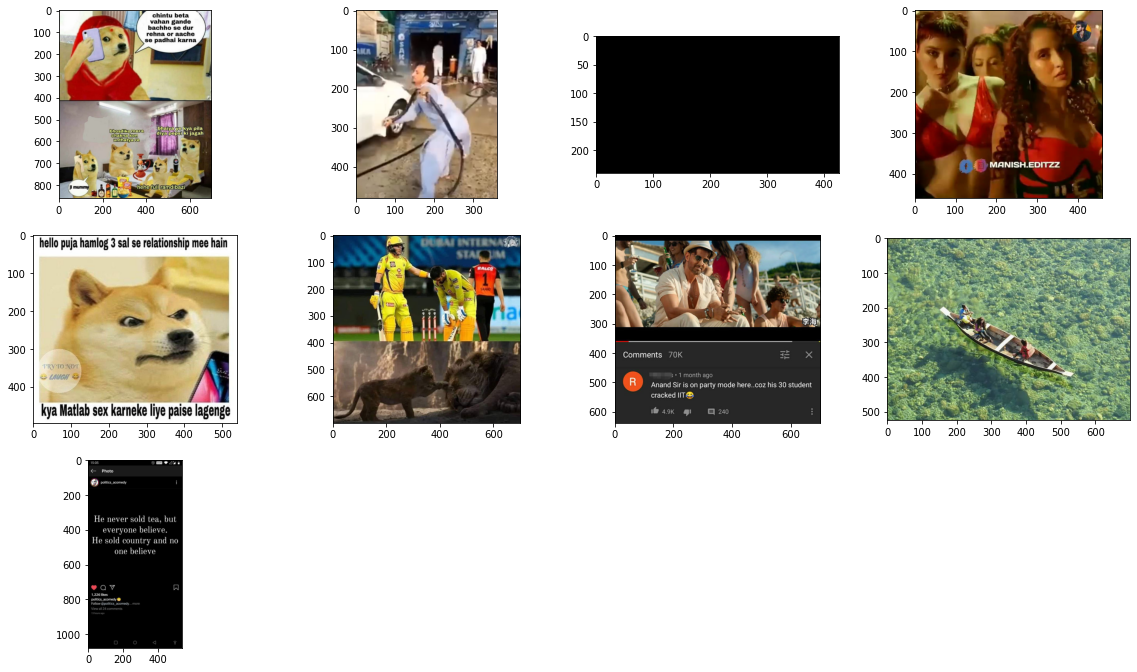

In [18]:
from PIL import Image
import requests
from io import BytesIO
img=[]
for i in range(1,len(images)):
  response = requests.get(images[i])
  img.append(Image.open(BytesIO(response.content)))
fig = plt.gcf()
fig.set_size_inches(20, 20)

for i in range(len(img)):
  plt.subplot(5,4, i + 1)
  plt.imshow(img[i])
plt.show()